In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('AirPassengers.csv')

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data=data.rename(columns={'#Passengers':'Passengers'})

In [5]:
data.head(2)

,Month,Passengers
0,1949-01,112
1,1949-02,118


In [6]:
data['year']=pd.DatetimeIndex(data['Month']).year

In [7]:
data.head(2)

,Month,Passengers,year
0,1949-01,112,1949
1,1949-02,118,1949


In [8]:
data['month']=pd.DatetimeIndex(data['Month']).month

In [9]:
data.head(2)

,Month,Passengers,year,month
0,1949-01,112,1949,1
1,1949-02,118,1949,2


In [10]:
data.drop(['Month'],axis=1,inplace=True)

In [11]:
data.head(2)

,Passengers,year,month
0,112,1949,1
1,118,1949,2


Text(0, 0.5, 'No. of Passengers')

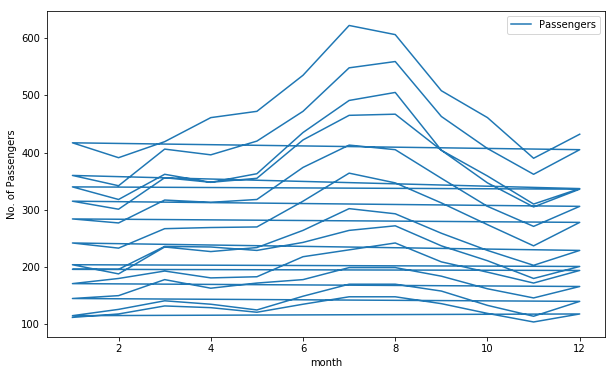

In [12]:
#data visualization
#plot between month and passengers
data.plot(x='month',y='Passengers',figsize=(10,6))
plt.xlabel('month')
plt.ylabel('No. of Passengers')

Text(0, 0.5, 'No. of Passengers')

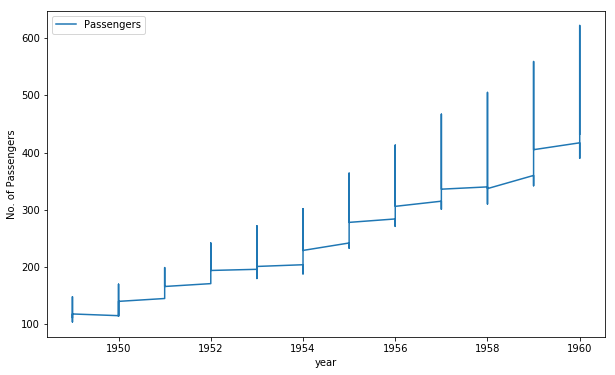

In [13]:
data.plot(x='year',y='Passengers',figsize=(10,6))
plt.xlabel('year')
plt.ylabel('No. of Passengers')


Text(0, 0.5, 'No. of Passengers')

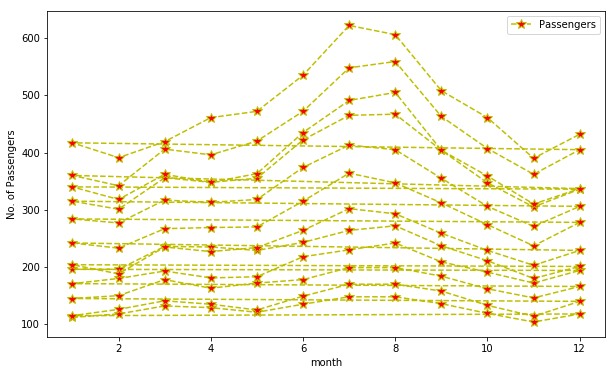

In [14]:
data.plot(x='month',y='Passengers',figsize=(10,6),linestyle='--', marker='*', 
          markerfacecolor='r',color='y',markersize=10)
plt.xlabel('month')
plt.ylabel('No. of Passengers')

Text(0, 0.5, 'No. of Passengers')

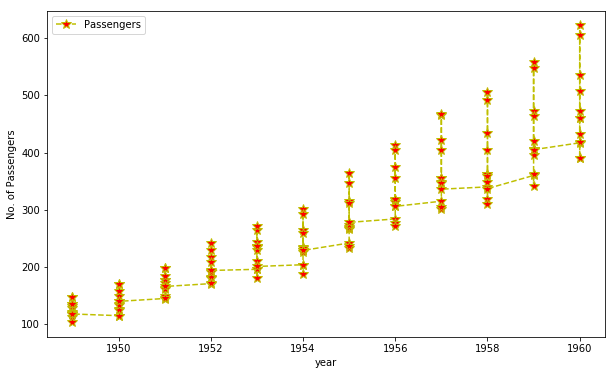

In [15]:
data.plot(x='year',y='Passengers',figsize=(10,6),linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=10)
plt.xlabel('year')
plt.ylabel('No. of Passengers')

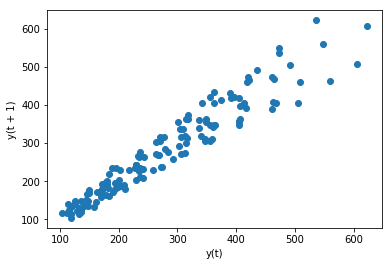

In [16]:
#lag plot
pd.plotting.lag_plot(data['Passengers'])

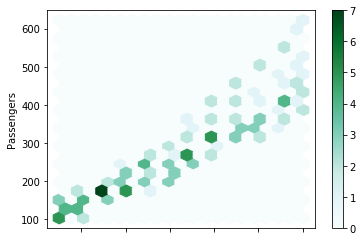

In [17]:
#hexbin plot
data.plot.hexbin(x='year',y='Passengers',gridsize=20)

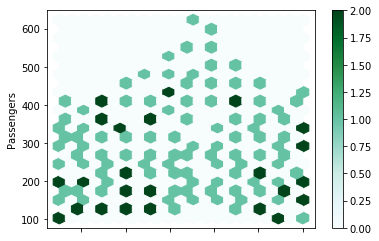

In [18]:
data.plot.hexbin(x='month',y='Passengers',gridsize=20)

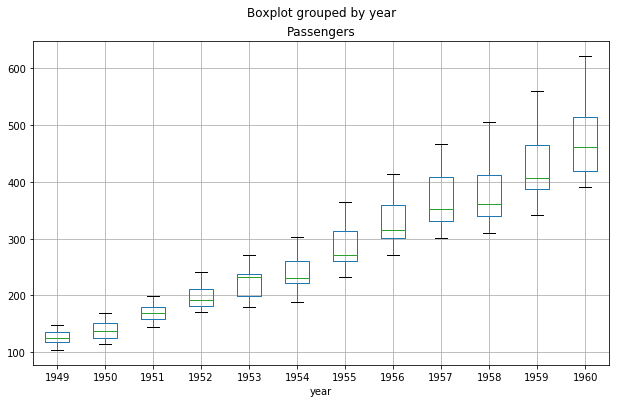

In [19]:
#box plot
a=data.boxplot(figsize=(10,6),by='year',column='Passengers')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


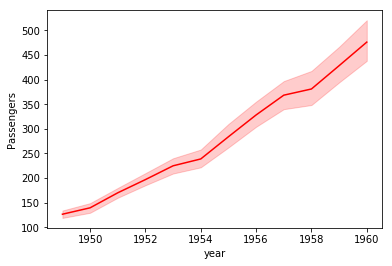

In [20]:
#lineplot between year and passengers
#import seaborn library
import seaborn as sns
sns.lineplot(x='year',y='Passengers',data=data,color='red')

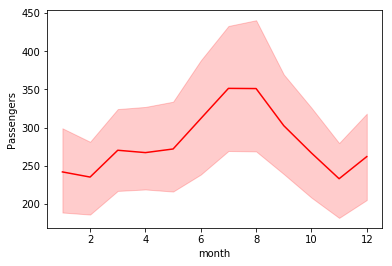

In [21]:
#lineplot between month and passengers
import seaborn as sns
sns.lineplot(x='month',y='Passengers',data=data,color='red')


In [22]:
#assiging data to train_df
train_df = pd.DataFrame(data)

In [23]:
# split into train and test sets
#considering 90% data as train set and 10% as test set 
train_len =  int(0.9*len(train_df))
test_len = len(train_df) - train_len

train,test = train_df.iloc[:train_len],train_df.iloc[train_len:len(train_df)]
print(train_df.shape,train.shape,test.shape)

(144, 3) (129, 3) (15, 3)


In [26]:
#import robust scaler
from sklearn.preprocessing import RobustScaler
#create object to scaler
rs = RobustScaler()
rs_pas = RobustScaler()

#to which columns apply scaling
t_c = ['year','month']
#normalize year and month column
train.loc[:,t_c] = rs.fit_transform(train[t_c].values)
test.loc[:,t_c] = rs.transform(test[t_c].values)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
train['Passengers'] = rs_pas.fit_transform(train[['Passengers']])
test['Passengers'] = rs_pas.transform(test[['Passengers']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
test

,Passengers,year,month
129,1.030303,0.833333,0.666667
130,0.757576,0.833333,0.833333
131,1.018182,0.833333,1.000000
132,1.090909,1.000000,-0.833333
133,0.933333,1.000000,-0.666667
134,1.103030,1.000000,-0.500000
135,1.357576,1.000000,-0.333333
136,1.424242,1.000000,-0.166667
137,1.806061,1.000000,0.000000
138,2.333333,1.000000,0.166667


In [29]:
train

,Passengers,year,month
0,-0.757576,-0.833333,-0.833333
1,-0.721212,-0.833333,-0.666667
2,-0.636364,-0.833333,-0.500000
3,-0.654545,-0.833333,-0.333333
4,-0.703030,-0.833333,-0.166667
5,-0.618182,-0.833333,0.000000
6,-0.539394,-0.833333,0.166667
7,-0.539394,-0.833333,0.333333
8,-0.612121,-0.833333,0.500000
9,-0.715152,-0.833333,0.666667


In [30]:
#converting test and train sets into numpy array
train.values
test.values

array([[ 1.03030303,  0.83333333,  0.66666667],
       [ 0.75757576,  0.83333333,  0.83333333],
       [ 1.01818182,  0.83333333,  1.        ],
       [ 1.09090909,  1.        , -0.83333333],
       [ 0.93333333,  1.        , -0.66666667],
       [ 1.1030303 ,  1.        , -0.5       ],
       [ 1.35757576,  1.        , -0.33333333],
       [ 1.42424242,  1.        , -0.16666667],
       [ 1.80606061,  1.        ,  0.        ],
       [ 2.33333333,  1.        ,  0.16666667],
       [ 2.23636364,  1.        ,  0.33333333],
       [ 1.64242424,  1.        ,  0.5       ],
       [ 1.35757576,  1.        ,  0.66666667],
       [ 0.92727273,  1.        ,  0.83333333],
       [ 1.18181818,  1.        ,  1.        ]])

In [31]:
## convert an array of values into a dataset matrix
def create_dataset(x,y,time_steps=1):
#create an empty lists
    x_train,y_train = [],[]
#time step is the next how many sequence of output
    for i in range(len(x)-time_steps):
        v = x.iloc[i:(i+time_steps)].values
#appending values to a lists
        x_train.append(v)
        y_train.append(y.iloc[i+time_steps])
#returning the list of arrays
    return np.array(x_train),np.array(y_train)

In [32]:
time_steps = 1

x_train,y_train = create_dataset(train,train.Passengers,time_steps)
x_test,y_test = create_dataset(test,test.Passengers,time_steps)

print(x_train.shape,y_train.shape)

(128, 1, 3) (128,)


In [34]:
#import keras library
import keras
#import sequential from keras
from keras.models import Sequential
#import different layers
from keras.layers import Dense,LSTM ,Bidirectional,Dropout

In [35]:
#intialise the sequential model
model = Sequential()
#add LSTM network layer 
model.add(Bidirectional(LSTM(128,
                            input_shape=(1,3))))
#add dropout layer
model.add(Dropout(0.25))
#add dense layer i.e. Output layer
model.add(Dense(1))
#trainig the model
model.compile(loss='mse',optimizer='adam')

In [36]:
history = model.fit(x_train,y_train,
                   epochs=400,
                   batch_size=32,
                   validation_split=0.1,
                   shuffle=False 
                   )




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 115 samples, validate on 13 samples
Epoch 1/400
115/115 [==============================] - 3s 23ms/step - loss: 0.3235 - val_loss: 1.2912
Epoch 2/400
115/115 [==============================] - 0s 292us/step - loss: 0.2947 - val_loss: 1.1931
Epoch 3/400
115/115 [==============================] - 0s 241us/step - loss: 0.2678 - val_loss: 1.0956
Epoch 4/400
115/115 [==============================] - 0s 258us/step - loss: 0.2503 - val_loss: 1.0009
Epoch 5/400
115/115 [==============================] - 0s 276us/step - loss: 0.2277 - val_loss: 0.9097
Epoch 6/400
115/115 [==============================] - 0s 217us/step - loss: 0.2076 - val_loss: 0.8220
Epoch 7/400
115/115 [==============================] - 0s 193us/step - loss: 0.1891 - val_loss: 0.7378
Epoch 8/400
115/115 [=

115/115 [==============================] - 0s 258us/step - loss: 0.0221 - val_loss: 0.0856
Epoch 66/400
115/115 [==============================] - 0s 248us/step - loss: 0.0208 - val_loss: 0.0853
Epoch 67/400
115/115 [==============================] - 0s 268us/step - loss: 0.0214 - val_loss: 0.0850
Epoch 68/400
115/115 [==============================] - 0s 299us/step - loss: 0.0232 - val_loss: 0.0848
Epoch 69/400
115/115 [==============================] - 0s 356us/step - loss: 0.0218 - val_loss: 0.0852
Epoch 70/400
115/115 [==============================] - 0s 349us/step - loss: 0.0206 - val_loss: 0.0859
Epoch 71/400
115/115 [==============================] - 0s 397us/step - loss: 0.0203 - val_loss: 0.0863
Epoch 72/400
115/115 [==============================] - 0s 346us/step - loss: 0.0217 - val_loss: 0.0863
Epoch 73/400
115/115 [==============================] - 0s 388us/step - loss: 0.0207 - val_loss: 0.0863
Epoch 74/400
115/115 [==============================] - 0s 378us/step - loss:

115/115 [==============================] - 0s 281us/step - loss: 0.0209 - val_loss: 0.0905
Epoch 144/400
115/115 [==============================] - 0s 205us/step - loss: 0.0207 - val_loss: 0.0907
Epoch 145/400
115/115 [==============================] - 0s 269us/step - loss: 0.0202 - val_loss: 0.0912
Epoch 146/400
115/115 [==============================] - 0s 207us/step - loss: 0.0199 - val_loss: 0.0919
Epoch 147/400
115/115 [==============================] - 0s 257us/step - loss: 0.0190 - val_loss: 0.0925
Epoch 148/400
115/115 [==============================] - 0s 237us/step - loss: 0.0211 - val_loss: 0.0931
Epoch 149/400
115/115 [==============================] - 0s 164us/step - loss: 0.0210 - val_loss: 0.0930
Epoch 150/400
115/115 [==============================] - 0s 219us/step - loss: 0.0204 - val_loss: 0.0923
Epoch 151/400
115/115 [==============================] - 0s 211us/step - loss: 0.0205 - val_loss: 0.0915
Epoch 152/400
115/115 [==============================] - 0s 187us/ste

115/115 [==============================] - 0s 222us/step - loss: 0.0192 - val_loss: 0.0917
Epoch 222/400
115/115 [==============================] - 0s 303us/step - loss: 0.0189 - val_loss: 0.0931
Epoch 223/400
115/115 [==============================] - 0s 288us/step - loss: 0.0203 - val_loss: 0.0961
Epoch 224/400
115/115 [==============================] - 0s 288us/step - loss: 0.0190 - val_loss: 0.0984
Epoch 225/400
115/115 [==============================] - 0s 310us/step - loss: 0.0198 - val_loss: 0.0982
Epoch 226/400
115/115 [==============================] - 0s 321us/step - loss: 0.0197 - val_loss: 0.0970
Epoch 227/400
115/115 [==============================] - 0s 355us/step - loss: 0.0203 - val_loss: 0.0964
Epoch 228/400
115/115 [==============================] - 0s 408us/step - loss: 0.0195 - val_loss: 0.0946
Epoch 229/400
115/115 [==============================] - 0s 363us/step - loss: 0.0203 - val_loss: 0.0942
Epoch 230/400
115/115 [==============================] - 0s 379us/ste

Epoch 299/400
115/115 [==============================] - 0s 344us/step - loss: 0.0199 - val_loss: 0.0876
Epoch 300/400
115/115 [==============================] - 0s 372us/step - loss: 0.0200 - val_loss: 0.0873
Epoch 301/400
115/115 [==============================] - 0s 315us/step - loss: 0.0206 - val_loss: 0.0882
Epoch 302/400
115/115 [==============================] - 0s 341us/step - loss: 0.0197 - val_loss: 0.0908
Epoch 303/400
115/115 [==============================] - 0s 295us/step - loss: 0.0180 - val_loss: 0.0920
Epoch 304/400
115/115 [==============================] - 0s 360us/step - loss: 0.0183 - val_loss: 0.0901
Epoch 305/400
115/115 [==============================] - 0s 397us/step - loss: 0.0199 - val_loss: 0.0864
Epoch 306/400
115/115 [==============================] - 0s 298us/step - loss: 0.0189 - val_loss: 0.0838
Epoch 307/400
115/115 [==============================] - 0s 364us/step - loss: 0.0208 - val_loss: 0.0828
Epoch 308/400
115/115 [==============================] 

Epoch 377/400
115/115 [==============================] - 0s 234us/step - loss: 0.0177 - val_loss: 0.0908
Epoch 378/400
115/115 [==============================] - 0s 325us/step - loss: 0.0174 - val_loss: 0.0843
Epoch 379/400
115/115 [==============================] - 0s 277us/step - loss: 0.0185 - val_loss: 0.0826
Epoch 380/400
115/115 [==============================] - 0s 335us/step - loss: 0.0178 - val_loss: 0.0849
Epoch 381/400
115/115 [==============================] - 0s 273us/step - loss: 0.0182 - val_loss: 0.0866
Epoch 382/400
115/115 [==============================] - 0s 295us/step - loss: 0.0185 - val_loss: 0.0885
Epoch 383/400
115/115 [==============================] - 0s 369us/step - loss: 0.0190 - val_loss: 0.0911
Epoch 384/400
115/115 [==============================] - 0s 263us/step - loss: 0.0159 - val_loss: 0.0904
Epoch 385/400
115/115 [==============================] - 0s 323us/step - loss: 0.0189 - val_loss: 0.0911
Epoch 386/400
115/115 [==============================] 

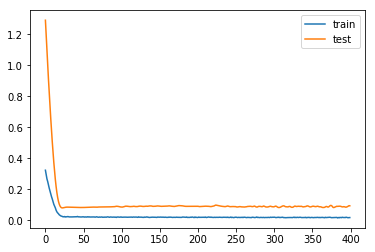

In [37]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()

In [38]:
x_test

array([[[ 1.03030303,  0.83333333,  0.66666667]],

       [[ 0.75757576,  0.83333333,  0.83333333]],

       [[ 1.01818182,  0.83333333,  1.        ]],

       [[ 1.09090909,  1.        , -0.83333333]],

       [[ 0.93333333,  1.        , -0.66666667]],

       [[ 1.1030303 ,  1.        , -0.5       ]],

       [[ 1.35757576,  1.        , -0.33333333]],

       [[ 1.42424242,  1.        , -0.16666667]],

       [[ 1.80606061,  1.        ,  0.        ]],

       [[ 2.33333333,  1.        ,  0.16666667]],

       [[ 2.23636364,  1.        ,  0.33333333]],

       [[ 1.64242424,  1.        ,  0.5       ]],

       [[ 1.35757576,  1.        ,  0.66666667]],

       [[ 0.92727273,  1.        ,  0.83333333]]])

In [39]:
y_pred = model.predict(x_test)
ot = rs_pas.inverse_transform(y_pred)
ot

array([[430.38306],
       [393.9216 ],
       [405.05493],
       [452.30768],
       [439.6937 ],
       [473.98935],
       [516.9602 ],
       [528.0742 ],
       [580.5852 ],
       [649.1251 ],
       [622.86206],
       [532.9678 ],
       [488.082  ],
       [432.0088 ]], dtype=float32)

In [40]:
y_test_inv = rs_pas.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = rs_pas.inverse_transform(y_pred)
y_pred_inv

array([[430.38306],
       [393.9216 ],
       [405.05493],
       [452.30768],
       [439.6937 ],
       [473.98935],
       [516.9602 ],
       [528.0742 ],
       [580.5852 ],
       [649.1251 ],
       [622.86206],
       [532.9678 ],
       [488.082  ],
       [432.0088 ]], dtype=float32)

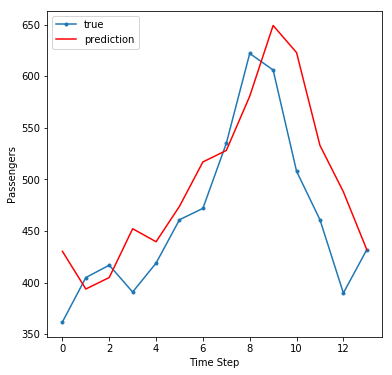

In [41]:
plt.figure(figsize=(6,6))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Passengers')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [42]:
#save the model
model.save('airline4-copy1.h5')

In [43]:
# evaluate the model performance
import math
trainScore = model.evaluate(x_train,y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.02 MSE (0.16 RMSE)
Test Score: 0.11 MSE (0.34 RMSE)


In [44]:
y_test_inv = rs_pas.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = rs_pas.inverse_transform(y_pred)

arr_1 = np.array(y_test_inv)
arr_2 = np.array(y_pred_inv)

actual = pd.DataFrame(data=arr_1.flatten(),columns=["actual"])
predicted = pd.DataFrame(data=arr_2.flatten(),columns = ["predicted"])

In [45]:
final = pd.concat([actual,predicted],axis=1)
final.head()

,actual,predicted
0,362.0,430.383057
1,405.0,393.921600
2,417.0,405.054932
3,391.0,452.307678
4,419.0,439.693695
